In [1]:
# requires installing nbformat

%run init.ipynb

2019-11-20 11:31:16,603 - root - INFO - Maximum size for inputs and outputs is: 42

2019-11-20 11:31:16,623 - root - INFO - Size of input vocabulary=56
2019-11-20 11:31:16,624 - root - INFO - Size of output vocabulary=1232
2019-11-20 11:31:16,625 - root - INFO - Seq2SeqDataBunch;

Train: LabelList (40689 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos x

xxunk
xxpad
xxbos
xxeos
xxfld
xxmaj
xxup
xxrep
xxwrep
xxunk
xxpad
xxbos
xxeos
xxfld
xxmaj
xxup
xxrep
xxwrep
n't
xxxs
clentele
d'oeuvres
-stars
d'oeuvre
-priced
yyyn
caféteria
2019-11-20 11:32:32,505 - root - INFO - Encoder embeddings saved to: ./enc_emb.pth
2019-11-20 11:32:32,511 - root - INFO - Encoder embeddings saved to: ./dec_emb.pth


/Users/nadjet/Work/seq2seq/seq2seq_venv/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Embedding. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [2]:
from seq2seq.seq2seq_tf import Seq2SeqRNN_tf
from fastai.text import Learner, partial
from utils.loss import Loss
from utils.bleu import CorpusBLEU
from utils.teacher_forcing import TeacherForcing
from utils.metrics import Metrics
from utils.predict import *
import random

In [3]:
dl.max_size

42

In [4]:
HIDDEN_LAYER_SIZE = 64
MAX_SIZE = dl.max_size
emb_enc = embs.emb_enc
emb_dec = embs.emb_dec
data = dl.data
seq2seq_loss = Loss.seq2seq_loss
seq2seq_acc = Metrics.seq2seq_acc

In [16]:
rnn_tf = Seq2SeqRNN_tf(emb_enc, emb_dec, HIDDEN_LAYER_SIZE, MAX_SIZE)

learn = Learner(data, rnn_tf, loss_func=seq2seq_loss, metrics=[seq2seq_acc, CorpusBLEU(len(data.y.vocab.itos))],
               callback_fns=partial(TeacherForcing, end_epoch=10))

## Training model

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 4.37E-03
Min loss divided by 10: 8.32E-03


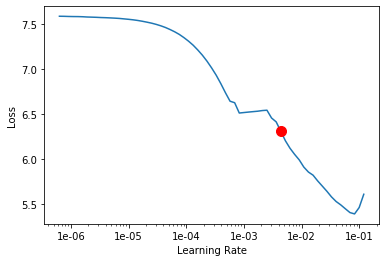

In [18]:
learn.recorder.plot(suggestion=True,skip_end=10)

In [ ]:
learn.fit_one_cycle(10, 4.37E-03)

epoch,train_loss,valid_loss,seq2seq_acc,bleu,time
0,1.015943,6.527029,0.214527,0.275883,06:33


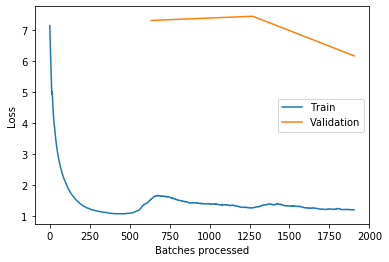

In [13]:
learn.recorder.plot_losses()

In [14]:
inputs, targets, outputs = get_predictions(learn)

In [ ]:
inputs[700], targets[700], outputs[700]

In [15]:
inputs[2513], targets[2513], outputs[2513]

(Text xxbos xxup xxx , coffee shop , xxmaj english , customer rating 3 out of 5 , family friendly yes , area riverside,
 Text xxbos xxmaj there is a friendly for kids coffee shop called xxup xxx that provides xxmaj english food in the riverside area . xxmaj the customer rating is 3 out of 5 .,
 Text xxbos xxmaj the xxup xxx is a xxmaj the xxup xxx is a xxmaj the xxup xxx is a xxmaj the xxup xxx is a xxmaj the xxup xxx restaurant at xxmaj the xxup xxx is a xxmaj the xxup xxx restaurant)

In [15]:
inputs[4000], targets[4000], outputs[4000]

(Text xxbos xxmaj the xxup xxx , customer rating 3 out of 5 , area riverside,
 Text xxbos xxmaj the xxup xxx along the riverside is rated 3 out of 5 .,
 Text xxbos xxmaj the xxup xxx is a riverside restaurant with a customer rating of 3 out of 5 .)

In [16]:
learn.save('model_tf')

## Get predictions from dataframe

In [32]:
dl0 = E2ENLGDataLoader(dataset_path,"trainset.csv","devset.csv",percentile=100)
dl0.setDataAndMaxSize()

2019-11-20 10:47:26,642 - root - INFO - Maximum size for inputs and outputs is: 95

2019-11-20 10:47:28,368 - root - INFO - Size of input vocabulary=56
2019-11-20 10:47:28,369 - root - INFO - Size of output vocabulary=1232
2019-11-20 10:47:28,370 - root - INFO - Seq2SeqDataBunch;

Train: LabelList (42061 items)
x: Seq2SeqTextList
xxbos xxmaj the xxup xxx , pub , customer rating 5 out of 5 , price range more than £ 30 , near xxup yyy,xxbos xxmaj the xxup xxx , pub , xxmaj english , price range cheap , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj japanese , customer rating low , price range less than £ 20 , family friendly yes , area riverside , near xxup yyy,xxbos xxmaj the xxup xxx , coffee shop , xxmaj french , price range £ 20 - 25 , area riverside , near the xxup yyy,xxbos xxup xxx , xxmaj french , customer rating high , area riverside , near the xxup yyy
y: TextList
xxbos xxmaj the xxup xxx pub near xxup yyy has a 5 star rating . xxmaj prices start at £ 30 .,xxbos x

In [33]:
HIDDEN_LAYER_SIZE = 64
MAX_SIZE = dl.max_size
emb_enc = embs.emb_enc
emb_dec = embs.emb_dec
data = dl0.data
seq2seq_loss = Loss.seq2seq_loss
seq2seq_acc = Metrics.seq2seq_acc

rnn_tf = Seq2SeqRNN_tf(emb_enc, emb_dec, HIDDEN_LAYER_SIZE, MAX_SIZE)

learn = Learner(data, rnn_tf, loss_func=seq2seq_loss, metrics=[seq2seq_acc, CorpusBLEU(len(data.y.vocab.itos))],
               callback_fns=partial(TeacherForcing, end_epoch=10))

In [34]:
learn = learn.load('model_tf')
learn

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_tf.pth'

In [9]:
inputs, targets, outputs = get_predictions(learn,ds_type=DatasetType.Train)

KeyboardInterrupt: 

In [ ]:
inputs[400],targets[400],outputs[400]

In [8]:
inputs, targets, outputs = get_predictions(learn,ds_type=DatasetType.Valid)

In [9]:
inputs[10],targets[10],outputs[10]

(Text xxbos xxmaj the xxup xxx , coffee shop , xxmaj chinese , customer rating high , price range £ 20 - 25 , family friendly yes , area city centre , near xxup yyy,
 Text xxbos xxmaj if you are looking for a coffee shop , try xxmaj the xxup xxx it offers xxmaj chines food and has an average price range with a xxmaj high customer rating . xxmaj it is located near the xxup yyy in the city centre and it is kid friendly,
 Text xxbos xxmaj the xxup xxx is a coffee shop that serves xxmaj chinese food in the £ 20 - 25 price range . xxmaj it is located in the city centre near xxup yyy . xxmaj it is kid friendly and has)

In [13]:
rows = []
for i in range(len(inputs)):
    row = {"input":inputs[i],"output":outputs[i],"target":targets[i]}
    rows.append(row)
df = pd.DataFrame(rows)
df.to_csv("gitignore/seq2seq_tf_dev.csv",index=False,sep="\t")

## Top-p sampling

In [10]:
rxs,rys,rzs,xs,ys,zs = preds_acts(learn)

In [11]:
idx=50
rx,ry,rz = rxs[idx],rys[idx],rzs[idx]
x,y,z = xs[idx],ys[idx],zs[idx]
rx,ry,rz

(Text xxbos xxmaj the xxup xxx , coffee shop , xxmaj chinese , customer rating 1 out of 5 , price range moderate , family friendly no , area city centre , near xxup yyy,
 Text xxbos xxmaj the xxup xxx coffee shop offers xxmaj chinese food at moderate price range , has customer rating of 1 out of 5 in city centre , is not kid friendly and is near xxup yyy .,
 Text xxbos xxmaj the xxup xxx is a coffee shop that serves xxmaj chinese food in the moderate price range . xxmaj it is located in the city centre near xxup yyy . xxmaj it is not kid friendly and has a customer)

In [12]:
rx,ry,rz = predict_with_decode(learn, x, y)
rz

Text xxbos xxmaj the xxup xxx is a coffee shop providing xxmaj chinese food in the moderate price range . xxmaj it is located in the city centre . xxmaj it is near xxup yyy . xxmaj its customer rating is 1 out

In [19]:
rows = []
for idx in range(len(rxs)):
    rx,ry,rz = rxs[idx],rys[idx],rzs[idx]
    x,y,z = xs[idx],ys[idx],zs[idx]
    px,py,pz = predict_with_decode(learn, x, y)
    row = {"input":rx,"target":ry,"output":pz}
    rows.append(row)

In [20]:
df = pd.DataFrame(rows)
df.to_csv("gitignore/top_p.csv",sep="\t",index=False)

In [22]:
df.sample(5)

,input,target,output
4121,"xxbos xxmaj the xxup xxx , customer rating low , family friendly yes , area riverside","xxbos xxmaj the low customer rated venue , xxmaj the xxup xxx , is a family - friendly venue in riverside .",xxbos xxmaj the xxup xxx is a family friendly restaurant located on the riverside . xxmaj it has a low customer rating .
2363,"xxbos xxup xxx , coffee shop , xxmaj english , customer rating 5 out of 5 , price range cheap , family friendly yes",xxbos xxup xxx is a coffee shop on a xxunk offering breakfast foods .,xxbos xxup xxx is a family friendly coffee shop with a cheap price range and a customer rating of 5 out of 5 .
3278,"xxbos xxup xxx , coffee shop , xxmaj english , customer rating average , price range high , family friendly yes",xxbos xxmaj the xxup xxx coffee shop is high priced and rated three stars . xxmaj it also serves food for the entire family .,xxbos xxup xxx is a coffee shop providing xxmaj xxmaj italian food in the high price range . xxmaj it is children friendly and has a customer rating of 3 out of 5 .
1011,"xxbos xxup xxx , coffee shop , xxmaj chinese , customer rating 3 out of 5 , price range moderate , family friendly yes , area city centre",xxbos xxup xxx is a coffee shop providing xxmaj chinese food in the moderate price range . xxmaj it is located in the city centre . xxmaj its customer rating is 3 out of 5 .,xxbos xxup xxx is a coffee shop providing xxmaj chinese food in the moderate price range . xxmaj it is located in the city centre . xxmaj its customer rating is 3 out of 5 .
3148,"xxbos xxmaj the xxup xxx , coffee shop , xxmaj english , customer rating average , price range cheap , area riverside",xxbos xxmaj the xxup xxx is a coffee shop that is along the river in the xxmaj city centre .,xxbos xxmaj the xxup xxx is a coffee shop with xxmaj english food in the riverside area with an average customer rating and cheap price range .


## Prepare for evaluation against e2e NLG baseline

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

In [2]:
df = pd.read_csv("../gitignore/seq2seq_tf_dev.csv",sep="\t")
#df = pd.read_csv("gitignore/top_p.csv",sep="\t")
df.sample(5)

,input,output,target
1495,"xxbos xxmaj the xxup xxx , coffee shop , xxmaj english , customer rating average , price range high , family friendly yes , near xxup yyy",xxbos xxmaj the xxup xxx is a high priced coffee shop that serves xxmaj english food . xxmaj it is located near xxup yyy . xxmaj it is family friendly and has an average customer rating .,xxbos xxmaj the xxup xxx coffee shop that is family friendly and has good reviews located conveniently next to xxup yyy .
1800,"xxbos xxmaj the xxup xxx , coffee shop , xxmaj chinese , price range high , family friendly no , area riverside , near xxup yyy",xxbos xxmaj the xxup xxx is a coffee shop that serves xxmaj chinese food in the high price range . xxmaj it is located in the riverside area near xxup yyy . xxmaj it is not children friendly .,xxbos xxmaj there is a coffee shop xxmaj the xxup xxx located riverside near xxup yyy . xxmaj they are not children friendly .
3144,"xxbos xxmaj the xxup xxx , coffee shop , xxmaj english , customer rating average , price range cheap , area riverside",xxbos xxmaj the xxup xxx is a cheap coffee shop located in the riverside area . xxmaj it has a customer rating of average and serves xxmaj italian food .,"xxbos xxmaj in the riverside area , is an inexpensive xxmaj english food coffee shop called xxmaj the xxup xxx . xxmaj it have an average rating by customers ."
3247,"xxbos xxup xxx , coffee shop , xxmaj chinese , customer rating average , price range high , family friendly yes",xxbos xxup xxx is a coffee shop that serves xxmaj chinese food . xxmaj it is children friendly and has a high price range and an average customer rating .,xxbos xxup xxx is a children friendly coffee shop which serves a selection of xxmaj chinese food at a high price range . xxup xxx has received a customer rating of average
2757,"xxbos xxup xxx , coffee shop , xxmaj chinese , customer rating 1 out of 5 , family friendly yes , area riverside",xxbos xxup xxx is a coffee shop that serves xxmaj chinese food . xxmaj it is located in the riverside area and has a customer rating of 1 out of 5 . xxmaj it is kid friendly .,xxbos xxup xxx coffee shop serves xxmaj chinese food in the riverside area and is kids friendly but has a customer rating of 1 out of 5


In [3]:
import os
from pathlib import Path
cwd = os.getcwd()
print("Working directory before change:",cwd)
path = Path(cwd)
path = path.parent
os.chdir(path)
print("Working directory after change:", os.getcwd())

Working directory before change: /Users/nadjet/Work/seq2seq/notebooks
Working directory after change: /Users/nadjet/Work/seq2seq


In [4]:
from e2e_nlg.evaluation.pipeline import DataFormattingPipeline

In [5]:
pipeline = DataFormattingPipeline(output_file="gitignore/seq2seq_tf_dev.csv",ref_file="gitignore/devset.csv",output_folder="gitignore")
#pipeline = DataFormattingPipeline(output_file="seq2seq/gitignore/top_p.csv",ref_file="seq2seq/gitignore/devset.csv",output_folder="seq2seq/gitignore/tf_top_p")

pipeline.prepare_data()

2019-11-20 10:48:02,302 - root - INFO - Formatting the MRs in the output...
2019-11-20 10:48:03,409 - root - INFO - ...Formatting the MRs in the output done! Written to: gitignore/formatted_output.csv
2019-11-20 10:48:03,410 - root - INFO - Relexicalizing output MRs and texts...
2019-11-20 10:48:24,606 - root - INFO - Wrote relexicalized data to gitignore/lexicalized_output.csv
2019-11-20 10:48:24,607 - root - INFO - ...Relexicalizing output MRs and texts done! Written to: gitignore/lexicalized_output.csv
2019-11-20 10:48:24,608 - root - INFO - Splitting reference into MRs and output files...
2019-11-20 10:48:25,287 - root - INFO - Saved grouped references to gitignore/ref_e2e_nlg.txt
2019-11-20 10:48:25,291 - root - INFO - Saved grouped references to gitignore/mr_e2e_nlg.txt
2019-11-20 10:48:25,292 - root - INFO - ...Splitting reference into MRs and output files done!
2019-11-20 10:48:25,293 - root - INFO - Writing output in same order as MRs...
2019-11-20 10:48:28,919 - root - INFO -

Prepare data for baseline:

In [4]:
from e2e_nlg.evaluation.out_formatter import OutputFormatter
out_formatter = OutputFormatter("gitignore/baseline/dev_mrs.txt", "gitignore/baseline/baseline-devel-output.csv", "gitignore/baseline")
preds_file = out_formatter.write_predictions()

2019-11-19 16:11:47,612 - root - INFO - Predictions written to gitignore/baseline/pred_e2e_nlg.txt
